Link 모음( 이유 : 과제 게시판에 못씀- 막혀있음)

Wandb : https://wandb.ai/-ddj127-korea-university-of-technology-and-education/fashionmnist-senet?nw=nwuserddj127



# 숙제 1

In [12]:

import torch
from torchvision import datasets, transforms

# 데이터 로드
train_data = datasets.FashionMNIST(
    './data/fashion_mnist', 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)

# Mean & Std 계산
imgs = torch.stack([img for img, _ in train_data], dim=0)
mean = imgs.mean(dim=[0, 2, 3])
std = imgs.std(dim=[0, 2, 3])

# 결과 출력
print(f"Train samples: {len(train_data)}")
print(f"Sample shape: {train_data[0][0].shape}")
print(f"Mean: {mean.item():.4f}")
print(f"Std:  {std.item():.4f}")

Train samples: 60000
Sample shape: torch.Size([1, 28, 28])
Mean: 0.2860
Std:  0.3530


In [13]:
import os
from pathlib import Path
import torch
import wandb
from torch import nn

from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import transforms
from utils import get_num_cpu_cores, is_linux, is_windows  # pyright: ignore
# BASE_PATH = str(Path(__file__).resolve())
# print(BASE_PATH)

# import sys

# # sys.path.append(BASE_PATH)
# sys.path.insert(0,BASE_PATH)

def get_fashion_mnist_data():
    data_path = os.getcwd() + 'a_fashion_mnist'
    f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())

    print("Num Train Samples : ", len(f_mnist_train))
    print("Sample Shape : ", f_mnist_train[0][0].shape)
    return f_mnist_train

def get_fashion_mnist_test_data():
    data_path = os.getcwd() + 'a_fashion_mnist'

    f_mnist_test_images = datasets.FashionMNIST(data_path, train=False, download = True)
    f_mnist_test = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())
    print("Num Train Samples : ", len(f_mnist_test))
    print("Sample Shape : ", f_mnist_test[0][0].shape)

    return f_mnist_test, f_mnist_test_images

def calculate_mean_std_v1():
    # 데이터 로드 (transform 없이)
    data_path = os.getcwd() + '/a_fashion_mnist'
    dataset = datasets.FashionMNIST(
        data_path, 
        train=True, 
        download=True, 
        transform=transforms.ToTensor()  # ToTensor만 적용
    )
    
    # DataLoader 생성
    loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=len(dataset),  # 전체 데이터를 한번에
        num_workers=0
    )
    
    # 전체 데이터 가져오기
    data = next(iter(loader))
    images = data[0]  # (N, C, H, W) 형태
    
    # Mean과 Std 계산
    mean = images.mean(dim=[0, 2, 3])  # 채널별 평균
    std = images.std(dim=[0, 2, 3])    # 채널별 표준편차
    
    print(f"Mean: {mean}")
    print(f"Std: {std}")
    
    return mean, std

def calculate_mean_std_v2(dataset):
    """
    torch.stack을 사용한 mean과 std 계산
    """
    print("\n" + "#" * 50)
    print("Calculating Mean and Std")
    print("#" * 50)
    
    # 첫 번째 이미지 확인
    img_t, _ = dataset[0]
    print(f"type: {type(img_t)}")
    print(f"shape: {img_t.shape}")
    print(f"min, max: {img_t.min()}, {img_t.max()}")
    
    print("#" * 50)
    
    # 모든 이미지를 스택으로 쌓기
    imgs = torch.stack([img_t for img_t, _ in dataset], dim=3)
    print(f"imgs.shape: {imgs.shape}")
    
    # Mean과 Std 계산
    mean = imgs.view(1, -1).mean(dim=-1)
    std = imgs.view(1, -1).std(dim=-1)
    
    print(f"\nmean: {mean}")
    print(f"std: {std}")
    
    return mean, std
if __name__ == "__main__":
    config = {'' :0}
    wandb.init(mode="disabled", config=config)

    f_mnist_train= get_fashion_mnist_data()
    f_mnist_test_images,f_mnist_test = get_fashion_mnist_test_data()

    print(f_mnist_train, f_mnist_test_images, f_mnist_test)
    
    mean, std = calculate_mean_std_v1()
    mean, std = calculate_mean_std_v2(f_mnist_train)
    

Num Train Samples :  60000
Sample Shape :  torch.Size([1, 28, 28])
Num Train Samples :  10000
Sample Shape :  torch.Size([1, 28, 28])
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: c:\Users\didsu\workspace\deeplearning\link_dl\_04_your_code\homework_3a_fashion_mnist
    Split: Train
    StandardTransform
Transform: ToTensor() Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: c:\Users\didsu\workspace\deeplearning\link_dl\_04_your_code\homework_3a_fashion_mnist
    Split: Test
    StandardTransform
Transform: ToTensor() Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: c:\Users\didsu\workspace\deeplearning\link_dl\_04_your_code\homework_3a_fashion_mnist
    Split: Test
Mean: tensor([0.2860])
Std: tensor([0.3530])

##################################################
Calculating Mean and Std
##################################################
type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])
min, max: 0.0, 1.0
###

In [14]:
# import os
# from pathlib import Path
# import torch
# import wandb
# from torch import nn

# from torch.utils.data import DataLoader, random_split
# from torchvision import datasets
# from torchvision.transforms import transforms

# BASE_PATH = str(Path(__file__).resolve().parent.parent.parent)  # BASE_PATH: /Users/yhhan/git/link_dl
# print(BASE_PATH)

# import sys

# sys.path.append(BASE_PATH)

# from utils import get_num_cpu_cores, is_linux, is_windows


# def get_fashion_mnist_data():
#     # data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")
#     data_path = os.getcwd()+ 'a_fashion_mnist'
#     f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
#     f_mnist_train, f_mnist_validation = random_split(f_mnist_train, [55_000, 5_000])

#     print("Num Train Samples: ", len(f_mnist_train))
#     print("Num Validation Samples: ", len(f_mnist_validation))
#     print("Sample Shape: ", f_mnist_train[0][0].shape)  # torch.Size([1, 28, 28])

#     num_data_loading_workers = get_num_cpu_cores() if is_linux() or is_windows() else 0
#     print("Number of Data Loading Workers:", num_data_loading_workers)

#     train_data_loader = DataLoader(
#         dataset=f_mnist_train, batch_size=wandb.config.batch_size, shuffle=True,
#         pin_memory=True, num_workers=num_data_loading_workers
#     )

#     validation_data_loader = DataLoader(
#         dataset=f_mnist_validation, batch_size=wandb.config.batch_size,
#         pin_memory=True, num_workers=num_data_loading_workers
#     )

#     f_mnist_transforms = nn.Sequential(
#         transforms.ConvertImageDtype(torch.float),
#         transforms.Normalize(mean=0.2860, std=0.3530),
#     )

#     return train_data_loader, validation_data_loader, f_mnist_transforms


# def get_fashion_mnist_test_data():
#     data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")

#     f_mnist_test_images = datasets.FashionMNIST(data_path, train=False, download=True)
#     f_mnist_test = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

#     print("Num Test Samples: ", len(f_mnist_test))
#     print("Sample Shape: ", f_mnist_test[0][0].shape)  # torch.Size([1, 28, 28])

#     test_data_loader = DataLoader(dataset=f_mnist_test, batch_size=len(f_mnist_test))

#     f_mnist_transforms = nn.Sequential(
#         transforms.ConvertImageDtype(torch.float),
#         transforms.Normalize(mean=0.2860, std=0.3530),
#     )

#     return f_mnist_test_images, test_data_loader, f_mnist_transforms


# if __name__ == "__main__":
#     config = {'batch_size': 2048, }
#     wandb.init(mode="disabled", config=config)

#     train_data_loader, validation_data_loader, f_mnist_transforms = get_fashion_mnist_data()
#     print()
#     f_mnist_test_images, test_data_loader, f_mnist_transforms = get_fashion_mnist_test_data()


# 숙제 2

In [ ]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert run script server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [16]:
# ==================== Cell 1: 라이브러리 import 및 경고 억제 ====================

import warnings
warnings.filterwarnings('ignore', message='.*UnsupportedFieldAttributeWarning.*')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import numpy as np
import wandb
from tqdm.notebook import tqdm  # Jupyter용 tqdm
import random
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.8.0+cu126
CUDA available: True
CUDA version: 12.6
GPU: NVIDIA GeForce RTX 4050 Laptop GPU


In [17]:
# ==================== Cell 2: 시드 설정 ====================

def set_seed(seed=42):
    """재현성을 위한 시드 설정"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"Random seed set to {seed}")

set_seed(42)

Random seed set to 42


In [ ]:
# ==================== Cell 3: 데이터 증강 클래스 ====================

class MixupTransform:
    """Mixup 데이터 증강"""
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        # alpha 값이 클수록 더 강한 혼합이 발생
        # Beta(alpha, alpha) 분포에서 혼합 비율을 샘플링
    def __call__(self, batch_data, batch_labels):
        """
        배치 단위로 Mixup 적용
        
        Args:
            batch_data: 입력 이미지 배치 [batch_size, channels, height, width]
            batch_target: 레이블 배치 [batch_size]
        
        Returns:
            mixed_data: 혼합된 이미지
            target_a, target_b: 원본 레이블들
            lam: 혼합 비율 (첫 번째 이미지의 가중치)
        """
        if self.alpha > 0:
            lam = np.random.beta(self.alpha, self.alpha)
        else:
            lam = 1
        
        batch_size = batch_data.size(0) # 배치 내에서 섞일 이미지 쌍을 무작위로 선택
        index = torch.randperm(batch_size).to(batch_data.device)
        # 픽셀 단위로 선형 보간 수행
        # mixed = λ * image1 + (1-λ) * image2
        mixed_data = lam * batch_data + (1 - lam) * batch_data[index]
        labels_a, labels_b = batch_labels, batch_labels[index]
        
        return mixed_data, labels_a, labels_b, lam


class CutMixTransform:
    """
    CutMix 데이터 증강 기법 구현
    한 이미지의 일부 영역을 다른 이미지의 패치로 교체
    Mixup보다 더 자연스러운 이미지를 생성하며 지역적 특징 학습을 강화
    """
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def __call__(self, batch_data, batch_labels):
        """
        배치 단위로 CutMix 적용
        
        작동 원리:
        1. Beta 분포에서 면적 비율을 샘플링
        2. 해당 면적에 맞는 사각형 패치 크기 계산
        3. 무작위 위치에 패치를 배치
        4. 다른 이미지의 해당 영역으로 교체
        """
        if self.alpha > 0:
            lam = np.random.beta(self.alpha, self.alpha)
        else:
            lam = 1
        
        batch_size = batch_data.size(0)
        index = torch.randperm(batch_size).to(batch_data.device)
        
        # CutMix 영역 계산
        # 이미지 크기 정보 추출
        _, _, H, W = batch_data.shape
        # 잘라낼 패치의 크기 계산
        # sqrt(1-λ)를 사용하여 면적 비율을 선형 크기로 변환
        cut_rat = np.sqrt(1. - lam)
        cut_w = int(W * cut_rat)
        cut_h = int(H * cut_rat)
        # 패치의 중심 좌표를 무작위로 선택
        cx = np.random.randint(W)
        cy = np.random.randint(H)
        # 패치의 중심 좌표를 무작위로 선택        
        bbx1 = np.clip(cx - cut_w // 2, 0, W)
        bby1 = np.clip(cy - cut_h // 2, 0, H)
        bbx2 = np.clip(cx + cut_w // 2, 0, W)
        bby2 = np.clip(cy + cut_h // 2, 0, H)
        # 선택된 영역을 다른 이미지의 패치로 교체
        mixed_data = batch_data.clone()
        mixed_data[:, :, bby1:bby2, bbx1:bbx2] = batch_data[index, :, bby1:bby2, bbx1:bbx2]
        
        # 실제 교체된 면적 비율을 다시 계산 (클리핑으로 인해 변경될 수 있음)
        lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (W * H))
        
        labels_a, labels_b = batch_labels, batch_labels[index]
        
        return mixed_data, labels_a, labels_b, lam

print("Data augmentation classes defined successfully!")

Data augmentation classes defined successfully!


In [19]:
# ==================== Cell 3: 데이터 증강 클래스 ====================

class MixupTransform:
    """Mixup 데이터 증강"""
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def __call__(self, batch_data, batch_labels):
        if self.alpha > 0:
            lam = np.random.beta(self.alpha, self.alpha)
        else:
            lam = 1
        
        batch_size = batch_data.size(0)
        index = torch.randperm(batch_size).to(batch_data.device)
        
        mixed_data = lam * batch_data + (1 - lam) * batch_data[index]
        labels_a, labels_b = batch_labels, batch_labels[index]
        
        return mixed_data, labels_a, labels_b, lam


class CutMixTransform:
    """CutMix 데이터 증강"""
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def __call__(self, batch_data, batch_labels):
        if self.alpha > 0:
            lam = np.random.beta(self.alpha, self.alpha)
        else:
            lam = 1
        
        batch_size = batch_data.size(0)
        index = torch.randperm(batch_size).to(batch_data.device)
        
        # CutMix 영역 계산
        _, _, H, W = batch_data.shape
        cut_rat = np.sqrt(1. - lam)
        cut_w = int(W * cut_rat)
        cut_h = int(H * cut_rat)
        
        cx = np.random.randint(W)
        cy = np.random.randint(H)
        
        bbx1 = np.clip(cx - cut_w // 2, 0, W)
        bby1 = np.clip(cy - cut_h // 2, 0, H)
        bbx2 = np.clip(cx + cut_w // 2, 0, W)
        bby2 = np.clip(cy + cut_h // 2, 0, H)
        
        mixed_data = batch_data.clone()
        mixed_data[:, :, bby1:bby2, bbx1:bbx2] = batch_data[index, :, bby1:bby2, bbx1:bbx2]
        
        # 실제 lambda 재계산
        lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (W * H))
        
        labels_a, labels_b = batch_labels, batch_labels[index]
        
        return mixed_data, labels_a, labels_b, lam

print("Data augmentation classes defined successfully!")

Data augmentation classes defined successfully!


In [ ]:
# ==================== Cell 4: SE Block ====================

class SEBlock(nn.Module):
    """
    Squeeze-and-Excitation 블록
    채널 간 상호 의존성을 모델링하여 중요한 특징을 강조하고
    덜 중요한 특징은 억제하는 주의 메커니즘
    """
    def __init__(self, channels, reduction=16):
        """
        Args:
            channels: 입력 채널 수
            reduction: 차원 축소 비율 (병목 구조의 압축 정도)
        """
        super(SEBlock, self).__init__()
        # Global Average Pooling으로 공간 정보를 압축
        # (B, C, H, W) -> (B, C, 1, 1)
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        # Excitation: 채널 간 관계를 학습하는 2층 FC 네트워크
        self.excitation = nn.Sequential(
           # 차원 축소로 계산량 감소 및 일반화 향상
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            # 원래 차원으로 복원
            nn.Linear(channels // reduction, channels, bias=False),
            # Sigmoid로 0-1 사이의 중요도 가중치 생성
            nn.Sigmoid()
        )
    
    def forward(self, x):
        """
        Forward pass 수행
        
        과정:
        1. Global Average Pooling으로 각 채널을 하나의 값으로 요약
        2. FC 레이어를 통해 채널 간 관계 학습
        3. Sigmoid로 채널별 중요도 가중치 계산
        4. 원본 특징맵에 가중치를 곱해 재조정
        """
        b, c, _, _ = x.size()
        # Squeeze: 공간 정보를 제거하고 채널 디스크립터 생성
        y = self.squeeze(x).view(b, c)
        # Excitation: 채널 중요도 계산
        y = self.excitation(y).view(b, c, 1, 1)
        # Scale: 원본 특징맵에 중요도 가중치 적용
        # expand_as로 공간 차원에 브로드캐스팅
        return x * y.expand_as(x)

print("SE Block defined successfully!")

SE Block defined successfully!


In [ ]:
# ==================== Cell 5: SENet Block ====================

class SENetBlock(nn.Module):
    """
    SEBlock이 포함된 잔차 블록
    ResNet의 잔차 연결과 SE 메커니즘을 결합하여
    깊은 네트워크에서도 효과적인 학습이 가능
    """
    def __init__(self, in_channels, out_channels, stride=1, reduction=16):
        # 첫 번째 컨볼루션 레이어
        # stride로 다운샘플링 수행 가능
        super(SENetBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        # 두 번째 컨볼루션 레이어
        # stride=1로 고정하여 공간 차원 유지
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        # SE 블록 추가
        self.se = SEBlock(out_channels, reduction)
        # Shortcut 연결 설정
        # 입출력 차원이 다른 경우 1x1 컨볼루션으로 맞춤
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, 
                         stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        """
        잔차 블록의 forward pass
        
        경로:
        1. 메인 경로: Conv -> BN -> ReLU -> Conv -> BN -> SE
        2. 숏컷 경로: 입력을 직접 연결 (필요시 차원 조정)
        3. 두 경로를 더하고 ReLU 적용
        """
        # 메인 경로
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = self.se(out)
        # 잔차 연결
        out += self.shortcut(x)
        out = F.relu(out)
        return out

print("SENet Block defined successfully!")

SENet Block defined successfully!


In [ ]:
# ==================== Cell 6: SENet 모델 ====================

class SENet(nn.Module):
    """
    Fashion MNIST를 위한 SENet 아키텍처
    4개의 스테이지로 구성되며 점진적으로 특징을 추상화
    """
    def __init__(self, num_classes=10, reduction=16):
        # 초기 컨볼루션 레이어
        # 흑백 이미지(1채널)를 32채널로 확장
        super(SENet, self).__init__()
        
        self.in_channels = 32
        
        # 초기 Conv 레이어
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        

        # 4개의 스테이지 구성
        # 각 스테이지마다 채널 수는 2배씩 증가, 공간 크기는 감소
        self.layer1 = self._make_layer(32, 2, stride=1, reduction=reduction)
        self.layer2 = self._make_layer(64, 2, stride=2, reduction=reduction)
        self.layer3 = self._make_layer(128, 2, stride=2, reduction=reduction)
        self.layer4 = self._make_layer(256, 2, stride=2, reduction=reduction)
        
        # Local Response Normalization
        # 인접한 채널 간 경쟁을 유도하여 특징의 다양성 증가
        self.lrn = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        
        # 분류기
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(256, num_classes)
    
    def _make_layer(self, out_channels, num_blocks, stride, reduction):
        """
        여러 개의 SENetBlock을 쌓아서 레이어 구성
        
        Args:
            in_channels: 입력 채널 수
            out_channels: 출력 채널 수
            num_blocks: 블록 개수
            stride: 첫 번째 블록의 stride (다운샘플링용)
            reduction: SE 블록의 reduction 비율
        """
        layers = []
        # 첫 번째 블록은 stride로 다운샘플링 수행
        layers.append(SENetBlock(self.in_channels, out_channels, stride, reduction))
        self.in_channels = out_channels
        # 나머지 블록들은 동일한 차원 유지
        for _ in range(1, num_blocks):
            layers.append(SENetBlock(out_channels, out_channels, 1, reduction))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        """
        전체 네트워크의 forward pass
        
        데이터 흐름:
        입력 (1, 28, 28)
        -> Conv1 + BN + ReLU + LRN: (32, 28, 28)
        -> Layer1: (32, 28, 28)
        -> Layer2: (64, 14, 14)  # stride=2로 다운샘플링
        -> Layer3: (128, 7, 7)   # stride=2로 다운샘플링
        -> Layer4: (256, 3, 3)   # stride=2로 다운샘플링
        -> GAP: (256, 1, 1)
        -> Flatten: (256,)
        -> Dropout + FC: (10,)
        """
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.lrn(out)
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc(out)
        
        return out

print("SENet model defined successfully!")

SENet model defined successfully!


In [23]:
# ==================== Cell 7: Early Stopping ====================

class EarlyStopping:
    """Early Stopping 구현"""
    def __init__(self, patience=10, min_delta=0.0, verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = None
    
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model = model.state_dict().copy()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model = model.state_dict().copy()
            self.counter = 0

print("Early Stopping class defined successfully!")

Early Stopping class defined successfully!


In [ ]:
# ==================== Cell 8: 학습 함수 ====================

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    """
    Mixup/CutMix를 위한 손실 함수
    두 레이블에 대한 손실을 혼합 비율에 따라 가중 평균
    
    Args:
        criterion: 기본 손실 함수 (CrossEntropyLoss)
        pred: 모델 예측값
        y_a, y_b: 혼합된 두 이미지의 원본 레이블
        lam: 혼합 비율
    
    Returns:
        가중 평균된 손실값
    """
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


def train_epoch(model, train_loader, criterion, optimizer, device, mixup, cutmix, use_mixing=True):
    """
    한 에폭 동안의 학습 수행
    
    학습 전략:
    1. 50% 확률로 데이터 증강 적용 (Mixup 또는 CutMix)
    2. Forward pass로 예측 수행
    3. 손실 계산 (증강 시 mixup_criterion 사용)
    4. Backward pass로 그래디언트 계산
    5. 옵티마이저로 파라미터 업데이트
    """
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    pbar = tqdm(train_loader, desc='Training', leave=True)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        
        # Mixing 적용 (50% 확률)
        if use_mixing and random.random() > 0.5:
            if random.random() > 0.5:
                # Mixup
                data, targets_a, targets_b, lam = mixup(data, target)
            else:
                # CutMix
                data, targets_a, targets_b, lam = cutmix(data, target)
            
            optimizer.zero_grad()
            outputs = model(data)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        else:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        
        pbar.set_postfix({
            'loss': f'{running_loss / (batch_idx + 1):.4f}',
            'acc': f'{100. * correct / total:.2f}%'
        })
    
    return running_loss / len(train_loader), 100. * correct / total


def validate(model, val_loader, criterion, device):
    """검증"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation', leave=True)
        for data, target in pbar:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            loss = criterion(outputs, target)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
            
            pbar.set_postfix({
                'loss': f'{running_loss / len(val_loader):.4f}',
                'acc': f'{100. * correct / total:.2f}%'
            })
    
    return running_loss / len(val_loader), 100. * correct / total

print("Training functions defined successfully!")

Training functions defined successfully!


In [ ]:
# ==================== Cell 9: 하이퍼파라미터 설정 ====================

config = {
    'batch_size': 128,
    'epochs': 55,
    'learning_rate': 0.001,
    'weight_decay': 0.0001,
    'mixup_alpha': 1.0,
    'cutmix_alpha': 1.0,
    'se_reduction': 16,
    'early_stopping_patience': 15,
}

print("Configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")

Configuration:
  batch_size: 128
  epochs: 55
  learning_rate: 0.001
  weight_decay: 0.0001
  mixup_alpha: 1.0
  cutmix_alpha: 1.0
  se_reduction: 16
  early_stopping_patience: 15


In [26]:
# ==================== Cell 10: Wandb 초기화 ====================

# Wandb 초기화
wandb.init(
    project='fashionmnist-senet',
    config=config,
    name='SENet-Mixup-CutMix'
)

print("Wandb initialized successfully!")

Wandb initialized successfully!


In [27]:
# ==================== Cell 11: 디바이스 및 데이터 준비 ====================

# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 데이터 변환
train_transform = transforms.Compose([
    transforms.Pad(4, fill=0),  # 28x28 -> 36x36
    transforms.RandomCrop(28),  # 36x36 -> 28x28
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

# 데이터셋 로드
print("\nLoading datasets...")
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=train_transform
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=test_transform
)

# 데이터로더
train_loader = DataLoader(
    train_dataset,
    batch_size=config['batch_size'],
    shuffle=True,
    num_workers=2,  # Jupyter에서는 적은 worker 사용
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Using device: cuda

Loading datasets...
Train dataset size: 60000
Test dataset size: 10000


In [28]:
# ==================== Cell 12: 모델 초기화 ====================

# 모델 초기화
model = SENet(num_classes=10, reduction=config['se_reduction']).to(device)
print(f'Total parameters: {sum(p.numel() for p in model.parameters()):,}')

# Wandb로 모델 추적
wandb.watch(model, log='all', log_freq=100)

# 손실 함수 및 최적화
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(
    model.parameters(),
    lr=config['learning_rate'],
    weight_decay=config['weight_decay']
)

# Mixing 변환
mixup = MixupTransform(alpha=config['mixup_alpha'])
cutmix = CutMixTransform(alpha=config['cutmix_alpha'])

# Early Stopping
early_stopping = EarlyStopping(
    patience=config['early_stopping_patience'],
    verbose=True
)

print("Model and training components initialized!")

Total parameters: 2,818,794
Model and training components initialized!


In [29]:
# ==================== Cell 13: 학습 실행 ====================

# 학습 히스토리 저장
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

best_acc = 0.0

for epoch in range(config['epochs']):
    print(f'\n{"="*70}')
    print(f'Epoch {epoch+1}/{config["epochs"]}')
    print(f'{"="*70}')
    
    # 학습
    train_loss, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, device, mixup, cutmix
    )
    
    # 검증
    val_loss, val_acc = validate(model, test_loader, criterion, device)
    
    # 히스토리 저장
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    # Wandb 로깅
    wandb.log({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'val_loss': val_loss,
        'val_acc': val_acc,
    })
    
    print(f'\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    # 최고 정확도 모델 저장
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_acc': best_acc,
        }, 'best_model.pth')
        print(f'✓ Best model saved with accuracy: {best_acc:.2f}%')
    
    # Early Stopping 체크
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print('\n' + '='*70)
        print('Early stopping triggered!')
        print('='*70)
        model.load_state_dict(early_stopping.best_model)
        break

print("\nTraining completed!")


Epoch 1/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 1.0295, Train Acc: 63.59%
Val Loss: 0.5846, Val Acc: 78.43%
✓ Best model saved with accuracy: 78.43%

Epoch 2/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.8128, Train Acc: 70.37%
Val Loss: 0.6133, Val Acc: 77.76%
EarlyStopping counter: 1 out of 15

Epoch 3/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.7854, Train Acc: 69.11%
Val Loss: 0.3416, Val Acc: 89.50%
✓ Best model saved with accuracy: 89.50%

Epoch 4/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.7038, Train Acc: 73.33%
Val Loss: 0.3240, Val Acc: 88.51%

Epoch 5/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.6834, Train Acc: 74.21%
Val Loss: 0.2558, Val Acc: 91.89%
✓ Best model saved with accuracy: 91.89%

Epoch 6/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.6571, Train Acc: 75.03%
Val Loss: 0.2722, Val Acc: 90.94%
EarlyStopping counter: 1 out of 15

Epoch 7/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.6342, Train Acc: 73.71%
Val Loss: 0.2420, Val Acc: 92.31%
✓ Best model saved with accuracy: 92.31%

Epoch 8/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.6095, Train Acc: 74.23%
Val Loss: 0.2301, Val Acc: 92.45%
✓ Best model saved with accuracy: 92.45%

Epoch 9/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.6171, Train Acc: 76.98%
Val Loss: 0.2620, Val Acc: 90.74%
EarlyStopping counter: 1 out of 15

Epoch 10/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5985, Train Acc: 74.40%
Val Loss: 0.2198, Val Acc: 93.01%
✓ Best model saved with accuracy: 93.01%

Epoch 11/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5501, Train Acc: 77.55%
Val Loss: 0.2198, Val Acc: 92.90%
EarlyStopping counter: 1 out of 15

Epoch 12/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.6035, Train Acc: 74.50%
Val Loss: 0.2236, Val Acc: 92.73%
EarlyStopping counter: 2 out of 15

Epoch 13/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5424, Train Acc: 78.44%
Val Loss: 0.2223, Val Acc: 92.38%
EarlyStopping counter: 3 out of 15

Epoch 14/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5057, Train Acc: 78.93%
Val Loss: 0.1911, Val Acc: 93.78%
✓ Best model saved with accuracy: 93.78%

Epoch 15/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5472, Train Acc: 77.99%
Val Loss: 0.1994, Val Acc: 93.23%
EarlyStopping counter: 1 out of 15

Epoch 16/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5042, Train Acc: 79.26%
Val Loss: 0.2163, Val Acc: 93.13%
EarlyStopping counter: 2 out of 15

Epoch 17/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5394, Train Acc: 79.25%
Val Loss: 0.2102, Val Acc: 92.78%
EarlyStopping counter: 3 out of 15

Epoch 18/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5514, Train Acc: 76.46%
Val Loss: 0.1997, Val Acc: 93.30%
EarlyStopping counter: 4 out of 15

Epoch 19/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5072, Train Acc: 79.35%
Val Loss: 0.1930, Val Acc: 93.48%
EarlyStopping counter: 5 out of 15

Epoch 20/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5148, Train Acc: 80.04%
Val Loss: 0.2066, Val Acc: 93.28%
EarlyStopping counter: 6 out of 15

Epoch 21/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5162, Train Acc: 77.97%
Val Loss: 0.2184, Val Acc: 93.37%
EarlyStopping counter: 7 out of 15

Epoch 22/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5356, Train Acc: 75.11%
Val Loss: 0.1795, Val Acc: 93.78%

Epoch 23/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4858, Train Acc: 78.89%
Val Loss: 0.1938, Val Acc: 93.74%
EarlyStopping counter: 1 out of 15

Epoch 24/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4983, Train Acc: 77.21%
Val Loss: 0.1875, Val Acc: 93.63%
EarlyStopping counter: 2 out of 15

Epoch 25/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4916, Train Acc: 78.17%
Val Loss: 0.1918, Val Acc: 94.17%
✓ Best model saved with accuracy: 94.17%
EarlyStopping counter: 3 out of 15

Epoch 26/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4835, Train Acc: 79.21%
Val Loss: 0.1932, Val Acc: 93.79%
EarlyStopping counter: 4 out of 15

Epoch 27/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.5157, Train Acc: 78.11%
Val Loss: 0.2025, Val Acc: 94.02%
EarlyStopping counter: 5 out of 15

Epoch 28/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4780, Train Acc: 79.67%
Val Loss: 0.2250, Val Acc: 94.28%
✓ Best model saved with accuracy: 94.28%
EarlyStopping counter: 6 out of 15

Epoch 29/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4623, Train Acc: 81.43%
Val Loss: 0.1839, Val Acc: 93.70%
EarlyStopping counter: 7 out of 15

Epoch 30/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4706, Train Acc: 77.88%
Val Loss: 0.1813, Val Acc: 94.34%
✓ Best model saved with accuracy: 94.34%
EarlyStopping counter: 8 out of 15

Epoch 31/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4602, Train Acc: 79.31%
Val Loss: 0.1942, Val Acc: 94.04%
EarlyStopping counter: 9 out of 15

Epoch 32/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4820, Train Acc: 80.59%
Val Loss: 0.2127, Val Acc: 94.02%
EarlyStopping counter: 10 out of 15

Epoch 33/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4419, Train Acc: 81.05%
Val Loss: 0.2085, Val Acc: 93.75%
EarlyStopping counter: 11 out of 15

Epoch 34/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4824, Train Acc: 79.30%
Val Loss: 0.1951, Val Acc: 93.77%
EarlyStopping counter: 12 out of 15

Epoch 35/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4394, Train Acc: 81.41%
Val Loss: 0.1996, Val Acc: 94.53%
✓ Best model saved with accuracy: 94.53%
EarlyStopping counter: 13 out of 15

Epoch 36/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4386, Train Acc: 81.44%
Val Loss: 0.1989, Val Acc: 94.31%
EarlyStopping counter: 14 out of 15

Epoch 37/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4588, Train Acc: 79.14%
Val Loss: 0.1730, Val Acc: 94.43%

Epoch 38/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4458, Train Acc: 80.86%
Val Loss: 0.1650, Val Acc: 94.35%

Epoch 39/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4525, Train Acc: 79.60%
Val Loss: 0.1717, Val Acc: 94.46%
EarlyStopping counter: 1 out of 15

Epoch 40/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4606, Train Acc: 80.97%
Val Loss: 0.2000, Val Acc: 94.20%
EarlyStopping counter: 2 out of 15

Epoch 41/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4571, Train Acc: 79.60%
Val Loss: 0.1864, Val Acc: 94.64%
✓ Best model saved with accuracy: 94.64%
EarlyStopping counter: 3 out of 15

Epoch 42/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4346, Train Acc: 81.13%
Val Loss: 0.1771, Val Acc: 94.39%
EarlyStopping counter: 4 out of 15

Epoch 43/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4321, Train Acc: 81.40%
Val Loss: 0.1807, Val Acc: 94.22%
EarlyStopping counter: 5 out of 15

Epoch 44/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4367, Train Acc: 80.93%
Val Loss: 0.1832, Val Acc: 94.24%
EarlyStopping counter: 6 out of 15

Epoch 45/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4400, Train Acc: 80.41%
Val Loss: 0.1856, Val Acc: 94.58%
EarlyStopping counter: 7 out of 15

Epoch 46/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4446, Train Acc: 80.77%
Val Loss: 0.1831, Val Acc: 94.34%
EarlyStopping counter: 8 out of 15

Epoch 47/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4674, Train Acc: 79.24%
Val Loss: 0.1814, Val Acc: 94.57%
EarlyStopping counter: 9 out of 15

Epoch 48/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4418, Train Acc: 79.16%
Val Loss: 0.1877, Val Acc: 94.41%
EarlyStopping counter: 10 out of 15

Epoch 49/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.3858, Train Acc: 82.27%
Val Loss: 0.1818, Val Acc: 94.50%
EarlyStopping counter: 11 out of 15

Epoch 50/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4133, Train Acc: 80.18%
Val Loss: 0.1828, Val Acc: 93.95%
EarlyStopping counter: 12 out of 15

Epoch 51/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4309, Train Acc: 80.79%
Val Loss: 0.1949, Val Acc: 94.91%
✓ Best model saved with accuracy: 94.91%
EarlyStopping counter: 13 out of 15

Epoch 52/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4402, Train Acc: 80.36%
Val Loss: 0.1903, Val Acc: 94.72%
EarlyStopping counter: 14 out of 15

Epoch 53/55


Training:   0%|          | 0/469 [00:00<?, ?it/s]

Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Train Loss: 0.4143, Train Acc: 81.11%
Val Loss: 0.1725, Val Acc: 94.59%
EarlyStopping counter: 15 out of 15

Early stopping triggered!

Training completed!


In [30]:
# ==================== Cell 14: 최종 테스트 ====================

print('\n' + '='*70)
print('Final Test Evaluation')
print('='*70)

test_loss, test_acc = validate(model, test_loader, criterion, device)
print(f'\nFinal Test Loss: {test_loss:.4f}')
print(f'Final Test Accuracy: {test_acc:.2f}%')

wandb.log({
    'final_test_loss': test_loss,
    'final_test_acc': test_acc
})


Final Test Evaluation


Validation:   0%|          | 0/79 [00:00<?, ?it/s]


Final Test Loss: 0.1725
Final Test Accuracy: 94.59%


In [31]:
# !pip install torchinfo

In [32]:
# ==================== Cell: 모델 구조 및 정보 확인 ====================

from torchinfo import summary

print("=" * 80)
print("MODEL ARCHITECTURE SUMMARY")
print("=" * 80)

# 모델 요약
model_summary = summary(
    model,
    input_size=(1, 1, 28, 28),
    col_names=["input_size", "output_size", "num_params", "kernel_size"],
    row_settings=["var_names"],
    verbose=1,
    device=device
)

print("\n" + "=" * 80)
print("MODEL STATISTICS")
print("=" * 80)

# 파라미터 통계
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params

print(f"Total Parameters:        {total_params:,}")
print(f"Trainable Parameters:    {trainable_params:,}")
print(f"Non-trainable Parameters: {non_trainable_params:,}")
print(f"Model Size (MB):         {total_params * 4 / (1024**2):.2f}")

print("=" * 80)

# 레이어별 파라미터 수
print("\n" + "=" * 80)
print("PARAMETERS BY LAYER TYPE")
print("=" * 80)

layer_params = {}
for name, module in model.named_modules():
    if len(list(module.children())) == 0:  # 최하위 레이어만
        num_params = sum(p.numel() for p in module.parameters())
        if num_params > 0:
            layer_type = type(module).__name__
            layer_params[layer_type] = layer_params.get(layer_type, 0) + num_params

for layer_type, num_params in sorted(layer_params.items(), key=lambda x: x[1], reverse=True):
    print(f"{layer_type:.<40} {num_params:>15,} ({num_params/total_params*100:>5.2f}%)")

print("=" * 80)

MODEL ARCHITECTURE SUMMARY
Layer (type (var_name))                            Input Shape               Output Shape              Param #                   Kernel Shape
SENet (SENet)                                      [1, 1, 28, 28]            [1, 10]                   --                        --
├─Conv2d (conv1)                                   [1, 1, 28, 28]            [1, 32, 28, 28]           288                       [3, 3]
├─BatchNorm2d (bn1)                                [1, 32, 28, 28]           [1, 32, 28, 28]           64                        --
├─LocalResponseNorm (lrn)                          [1, 32, 28, 28]           [1, 32, 28, 28]           --                        --
├─Sequential (layer1)                              [1, 32, 28, 28]           [1, 32, 28, 28]           --                        --
│    └─SENetBlock (0)                              [1, 32, 28, 28]           [1, 32, 28, 28]           --                        --
│    │    └─Conv2d (conv1)         

# 숙제 3

In [33]:
# ==================== Cell 1: 라이브러리 import ====================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm.notebook import tqdm  # Jupyter용 tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.8.0+cu126
CUDA available: True
GPU: NVIDIA GeForce RTX 4050 Laptop GPU


In [34]:
# ==================== Cell 2: 시드 설정 ====================

def set_seed(seed=42):
    """재현성을 위한 시드 설정"""
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"Random seed set to {seed}")

set_seed(42)

Random seed set to 42


In [35]:
# ==================== Cell 3: SE Block ====================

class SEBlock(nn.Module):
    """Squeeze-and-Excitation Block"""
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

print("SE Block defined!")

SE Block defined!


In [36]:
# ==================== Cell 4: SENet Block ====================

class SENetBlock(nn.Module):
    """SENet의 기본 블록"""
    def __init__(self, in_channels, out_channels, stride=1, reduction=16):
        super(SENetBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.se = SEBlock(out_channels, reduction)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, 
                         stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = self.se(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

print("SENet Block defined!")

SENet Block defined!


In [37]:
# ==================== Cell 5: SENet 모델 ====================

class SENet(nn.Module):
    """FashionMNIST용 SENet"""
    def __init__(self, num_classes=10, reduction=16):
        super(SENet, self).__init__()
        
        self.in_channels = 32
        
        # 초기 Conv 레이어
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        
        # SE 블록들
        self.layer1 = self._make_layer(32, 2, stride=1, reduction=reduction)
        self.layer2 = self._make_layer(64, 2, stride=2, reduction=reduction)
        self.layer3 = self._make_layer(128, 2, stride=2, reduction=reduction)
        self.layer4 = self._make_layer(256, 2, stride=2, reduction=reduction)
        
        # Local Response Normalization
        self.lrn = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        
        # 분류기
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(256, num_classes)
    
    def _make_layer(self, out_channels, num_blocks, stride, reduction):
        layers = []
        layers.append(SENetBlock(self.in_channels, out_channels, stride, reduction))
        self.in_channels = out_channels
        for _ in range(1, num_blocks):
            layers.append(SENetBlock(out_channels, out_channels, 1, reduction))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.lrn(out)
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc(out)
        
        return out

print("SENet model defined!")

SENet model defined!


In [38]:
# ==================== Cell 6: 테스트 함수 ====================

def test_model(model, test_loader, device):
    """모델 테스트 및 상세 결과 출력"""
    model.eval()
    
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    
    # FashionMNIST 클래스 이름
    class_names = [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
    
    all_predictions = []
    all_targets = []
    
    print("\n" + "="*70)
    print("Testing Model on FashionMNIST Test Dataset")
    print("="*70)
    
    with torch.no_grad():
        pbar = tqdm(test_loader, desc='Testing', leave=True)
        for data, target in pbar:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = outputs.max(1)
            
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
            
            # 클래스별 정확도 계산
            for i in range(len(target)):
                label = target[i].item()
                class_total[label] += 1
                if predicted[i] == label:
                    class_correct[label] += 1
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            
            current_acc = 100. * correct / total
            pbar.set_postfix({'accuracy': f'{current_acc:.2f}%'})
    
    # 전체 정확도
    overall_accuracy = 100. * correct / total
    
    print("\n" + "="*70)
    print("Test Results")
    print("="*70)
    print(f"Overall Test Accuracy: {overall_accuracy:.2f}% ({correct}/{total})")
    print("="*70)
    
    # 클래스별 정확도
    print("\nPer-Class Accuracy:")
    print("-" * 70)
    print(f"{'Class Name':<15} {'Accuracy':<12} {'Correct/Total':<20}")
    print("-" * 70)
    
    class_accuracies = []
    for i in range(10):
        if class_total[i] > 0:
            class_acc = 100. * class_correct[i] / class_total[i]
            class_accuracies.append(class_acc)
            print(f"{class_names[i]:<15} {class_acc:>6.2f}%      "
                  f"{class_correct[i]:>4}/{class_total[i]:<4}")
        else:
            class_accuracies.append(0)
            print(f"{class_names[i]:<15} N/A")
    
    print("-" * 70)
    
    # 가장 잘 인식한 클래스와 가장 못한 클래스
    best_class_idx = class_accuracies.index(max(class_accuracies))
    worst_class_idx = class_accuracies.index(min(class_accuracies))
    
    print(f"\nBest Performance : {class_names[best_class_idx]:<15} ({class_accuracies[best_class_idx]:.2f}%)")
    print(f"Worst Performance: {class_names[worst_class_idx]:<15} ({class_accuracies[worst_class_idx]:.2f}%)")
    print("="*70 + "\n")
    
    return overall_accuracy, class_accuracies, all_predictions, all_targets, class_names

print("Test function defined!")

Test function defined!


In [39]:
# ==================== Cell 7: 디바이스 설정 ====================

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')

Using device: cuda
GPU: NVIDIA GeForce RTX 4050 Laptop GPU


In [40]:
# ==================== Cell 8: 테스트 데이터 로드 ====================

# 테스트 데이터 변환 (Normalization만)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

# 테스트 데이터셋 로드
print("Loading FashionMNIST test dataset...")
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=test_transform
)

test_loader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

print(f"Test dataset size: {len(test_dataset)}")

Loading FashionMNIST test dataset...
Test dataset size: 10000


In [41]:
# ==================== Cell 9: 모델 초기화 및 로드 ====================

# 모델 초기화
print("\nInitializing SENet model...")
model = SENet(num_classes=10, reduction=16).to(device)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# 학습된 모델 로드
checkpoint_path = 'best_model.pth'
print(f"\nLoading trained model from '{checkpoint_path}'...")

try:
    checkpoint = torch.load(checkpoint_path, map_location=device)
    
    # 체크포인트 정보 출력
    if 'epoch' in checkpoint:
        print(f"Model trained for {checkpoint['epoch'] + 1} epochs")
    if 'best_acc' in checkpoint:
        print(f"Best validation accuracy during training: {checkpoint['best_acc']:.2f}%")
    
    # 모델 가중치 로드
    model.load_state_dict(checkpoint['model_state_dict'])
    print("✓ Model loaded successfully!")
    
except FileNotFoundError:
    print(f"❌ Error: Model file '{checkpoint_path}' not found!")
    print("Please make sure the model file exists in the current directory.")
except Exception as e:
    print(f"❌ Error loading model: {e}")


Initializing SENet model...
Total parameters: 2,818,794
Trainable parameters: 2,818,794

Loading trained model from 'best_model.pth'...
Model trained for 51 epochs
Best validation accuracy during training: 94.91%
✓ Model loaded successfully!


In [42]:
# ==================== Cell 10: 모델 테스트 실행 ====================

# 테스트 실행
overall_acc, class_accs, predictions, targets, class_names = test_model(
    model, test_loader, device
)


Testing Model on FashionMNIST Test Dataset


Testing:   0%|          | 0/79 [00:00<?, ?it/s]


Test Results
Overall Test Accuracy: 94.91% (9491/10000)

Per-Class Accuracy:
----------------------------------------------------------------------
Class Name      Accuracy     Correct/Total       
----------------------------------------------------------------------
T-shirt/top      89.20%       892/1000
Trouser          99.40%       994/1000
Pullover         92.90%       929/1000
Dress            96.30%       963/1000
Coat             93.30%       933/1000
Sandal           99.40%       994/1000
Shirt            85.10%       851/1000
Sneaker          99.40%       994/1000
Bag              99.60%       996/1000
Ankle boot       94.50%       945/1000
----------------------------------------------------------------------

Best Performance : Bag             (99.60%)
Worst Performance: Shirt           (85.10%)



In [43]:
# ==================== Cell 14: 최종 요약 ====================

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"Model: SENet with SE Blocks (reduction=16)")
print(f"Dataset: FashionMNIST Test Set (10,000 samples)")
print(f"Device: {device}")
print(f"Total Parameters: {total_params:,}")
print(f"\nFinal Test Accuracy: {overall_acc:.2f}%")
print(f"Average Per-Class Accuracy: {np.mean(class_accs):.2f}%")
print(f"Best Class: {class_names[np.argmax(class_accs)]} ({max(class_accs):.2f}%)")
print(f"Worst Class: {class_names[np.argmin(class_accs)]} ({min(class_accs):.2f}%)")
print("="*70 + "\n")

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame({
    'Class': class_names,
    'Accuracy (%)': [f'{acc:.2f}' for acc in class_accs]
})

print("\nDetailed Results Table:")
print(results_df.to_string(index=False))


FINAL SUMMARY
Model: SENet with SE Blocks (reduction=16)
Dataset: FashionMNIST Test Set (10,000 samples)
Device: cuda
Total Parameters: 2,818,794

Final Test Accuracy: 94.91%
Average Per-Class Accuracy: 94.91%
Best Class: Bag (99.60%)
Worst Class: Shirt (85.10%)


Detailed Results Table:
      Class Accuracy (%)
T-shirt/top        89.20
    Trouser        99.40
   Pullover        92.90
      Dress        96.30
       Coat        93.30
     Sandal        99.40
      Shirt        85.10
    Sneaker        99.40
        Bag        99.60
 Ankle boot        94.50


# 숙제 4


SAMPLE TEST PREDICTIONS - FashionMNIST SENet

Using device: cuda
GPU: NVIDIA GeForce RTX 4050 Laptop GPU

Loading FashionMNIST test dataset...
Test dataset size: 10000

Initializing SENet model...
Total parameters: 2,818,794

Loading trained model from 'best_model.pth'...
Model trained for 51 epochs
Best validation accuracy: 94.91%
✓ Model loaded successfully!

Finding samples with at least one misclassification...
Total test samples: 10000
Correct predictions: 9491
Incorrect predictions: 509

Selected 3 incorrect and 7 correct predictions

SAMPLE TEST PREDICTIONS

[Sample 1/10]
  1) Image Index: 4754
  2) True Label: 3 (Dress)
  3) Predicted Label: 3 (Dress)
     Confidence: 89.75%
  4) Match: ✓ CORRECT
----------------------------------------------------------------------------------------------------
[Sample 2/10]
  1) Image Index: 3856
  2) True Label: 1 (Trouser)
  3) Predicted Label: 1 (Trouser)
     Confidence: 99.00%
  4) Match: ✓ CORRECT
--------------------------------------

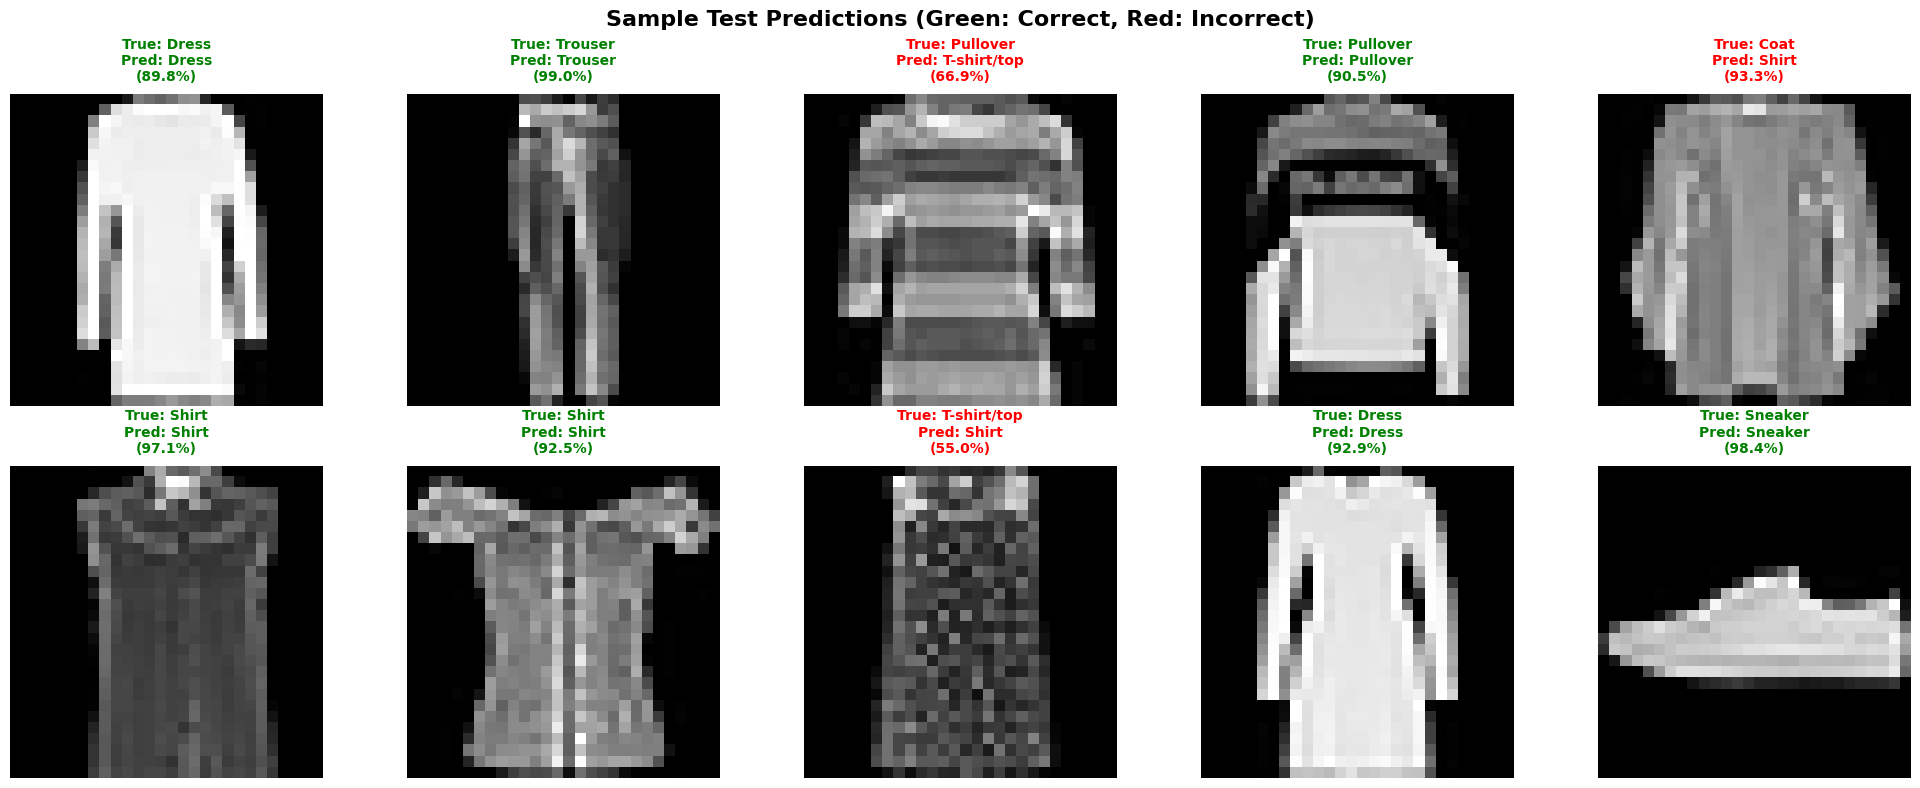


✓ Visualization saved as 'sample_predictions_detailed.png'

DETAILED ANALYSIS

Misclassified Samples (3):
----------------------------------------------------------------------------------------------------
  Index 382: Pullover → T-shirt/top (Confidence: 66.94%)
  Index 1408: Coat → Shirt (Confidence: 93.34%)
  Index 6293: T-shirt/top → Shirt (Confidence: 55.05%)

Testing completed successfully!



In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import random

# 재현성을 위한 시드 설정
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)


# ==================== SE Block ====================

class SEBlock(nn.Module):
    """Squeeze-and-Excitation Block"""
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)


# ==================== SENet Block ====================

class SENetBlock(nn.Module):
    """SENet의 기본 블록"""
    def __init__(self, in_channels, out_channels, stride=1, reduction=16):
        super(SENetBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.se = SEBlock(out_channels, reduction)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, 
                         stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = self.se(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out


# ==================== SENet 모델 ====================

class SENet(nn.Module):
    """FashionMNIST용 SENet"""
    def __init__(self, num_classes=10, reduction=16):
        super(SENet, self).__init__()
        
        self.in_channels = 32
        
        # 초기 Conv 레이어
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        
        # SE 블록들
        self.layer1 = self._make_layer(32, 2, stride=1, reduction=reduction)
        self.layer2 = self._make_layer(64, 2, stride=2, reduction=reduction)
        self.layer3 = self._make_layer(128, 2, stride=2, reduction=reduction)
        self.layer4 = self._make_layer(256, 2, stride=2, reduction=reduction)
        
        # Local Response Normalization
        self.lrn = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        
        # 분류기
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(256, num_classes)
    
    def _make_layer(self, out_channels, num_blocks, stride, reduction):
        layers = []
        layers.append(SENetBlock(self.in_channels, out_channels, stride, reduction))
        self.in_channels = out_channels
        for _ in range(1, num_blocks):
            layers.append(SENetBlock(out_channels, out_channels, 1, reduction))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.lrn(out)
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc(out)
        
        return out


# ==================== 샘플 테스트 함수 ====================

def test_sample_predictions(model, test_dataset, device, num_samples=10, ensure_error=True):
    """
    샘플 테스트 데이터의 분류 예측 결과를 확인하고 시각화
    
    Args:
        model: 학습된 모델
        test_dataset: 테스트 데이터셋
        device: 디바이스 (cuda/cpu)
        num_samples: 확인할 샘플 수 (기본값: 10)
        ensure_error: 최소 1개의 오분류 포함 여부 (기본값: True)
    """
    
    model.eval()
    
    # FashionMNIST 클래스 이름
    class_names = [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
    
    # 전체 테스트 데이터에서 예측 수행
    print("\n" + "="*100)
    print("Finding samples with at least one misclassification...")
    print("="*100)
    
    all_predictions = []
    all_labels = []
    all_indices = []
    
    with torch.no_grad():
        for idx in range(len(test_dataset)):
            image, label = test_dataset[idx]
            image_tensor = image.unsqueeze(0).to(device)
            
            output = model(image_tensor)
            _, predicted = output.max(1)
            
            all_predictions.append(predicted.item())
            all_labels.append(label)
            all_indices.append(idx)
    
    # 정확한 예측과 오분류 인덱스 찾기
    correct_indices = [i for i in range(len(all_labels)) if all_predictions[i] == all_labels[i]]
    incorrect_indices = [i for i in range(len(all_labels)) if all_predictions[i] != all_labels[i]]
    
    print(f"Total test samples: {len(test_dataset)}")
    print(f"Correct predictions: {len(correct_indices)}")
    print(f"Incorrect predictions: {len(incorrect_indices)}")
    
    # 샘플 선택
    selected_indices = []
    
    if ensure_error and len(incorrect_indices) > 0:
        # 최소 1개의 오분류 포함
        num_incorrect = min(3, len(incorrect_indices))  # 최대 3개의 오분류
        num_correct = num_samples - num_incorrect
        
        selected_incorrect = random.sample(incorrect_indices, num_incorrect)
        selected_correct = random.sample(correct_indices, min(num_correct, len(correct_indices)))
        
        selected_indices = selected_incorrect + selected_correct
        random.shuffle(selected_indices)  # 순서 섞기
        
        print(f"\nSelected {num_incorrect} incorrect and {len(selected_correct)} correct predictions")
    else:
        # 랜덤 선택
        selected_indices = random.sample(range(len(test_dataset)), num_samples)
        print(f"\nRandomly selected {num_samples} samples")
    
    # 결과 저장
    results = []
    
    print("\n" + "="*100)
    print("SAMPLE TEST PREDICTIONS")
    print("="*100 + "\n")
    
    with torch.no_grad():
        for i, idx in enumerate(selected_indices, 1):
            image, true_label = test_dataset[idx]
            image_tensor = image.unsqueeze(0).to(device)
            
            # 예측
            output = model(image_tensor)
            probabilities = F.softmax(output, dim=1)
            confidence, predicted = probabilities.max(1)
            
            predicted_label = predicted.item()
            confidence_score = confidence.item() * 100
            
            # 결과 저장
            results.append({
                'index': idx,
                'image': image,
                'true_label': true_label,
                'true_class': class_names[true_label],
                'predicted_label': predicted_label,
                'predicted_class': class_names[predicted_label],
                'confidence': confidence_score,
                'is_correct': true_label == predicted_label
            })
            
            # 텍스트 출력
            print(f"[Sample {i}/10]")
            print(f"  1) Image Index: {idx}")
            print(f"  2) True Label: {true_label} ({class_names[true_label]})")
            print(f"  3) Predicted Label: {predicted_label} ({class_names[predicted_label]})")
            print(f"     Confidence: {confidence_score:.2f}%")
            print(f"  4) Match: {'✓ CORRECT' if true_label == predicted_label else '✗ INCORRECT'}")
            print("-" * 100)
    
    # 통계
    correct_count = sum(1 for r in results if r['is_correct'])
    print(f"\nSummary: {correct_count}/{num_samples} correct predictions ({correct_count/num_samples*100:.1f}%)")
    print("="*100)
    
    # 시각화
    visualize_predictions(results, num_samples)
    
    return results


def visualize_predictions(results, num_samples=10):
    """예측 결과 시각화"""
    
    # 그리드 설정
    rows = 2
    cols = 5
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
    axes = axes.ravel()
    
    for i, result in enumerate(results[:num_samples]):
        ax = axes[i]
        
        # 이미지 denormalize
        img = result['image'].squeeze().numpy()
        img = img * 0.3530 + 0.2860
        img = np.clip(img, 0, 1)
        
        # 이미지 표시
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        # 제목 설정
        true_class = result['true_class']
        pred_class = result['predicted_class']
        confidence = result['confidence']
        is_correct = result['is_correct']
        
        # 색상 설정
        color = 'green' if is_correct else 'red'
        title_text = f"True: {true_class}\nPred: {pred_class}\n({confidence:.1f}%)"
        
        ax.set_title(title_text, fontsize=10, fontweight='bold', color=color, pad=10)
        
        # 테두리 추가
        for spine in ax.spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)
    
    plt.suptitle('Sample Test Predictions (Green: Correct, Red: Incorrect)', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('sample_predictions_detailed.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Visualization saved as 'sample_predictions_detailed.png'")


# ==================== 메인 실행 ====================

def main():
    print("\n" + "="*100)
    print("SAMPLE TEST PREDICTIONS - FashionMNIST SENet")
    print("="*100)
    
    # 디바이스 설정
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"\nUsing device: {device}")
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name(0)}")
    
    # 테스트 데이터 변환
    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.2860,), (0.3530,))
    ])
    
    # 테스트 데이터셋 로드
    print("\nLoading FashionMNIST test dataset...")
    test_dataset = datasets.FashionMNIST(
        root='./data',
        train=False,
        download=True,
        transform=test_transform
    )
    print(f"Test dataset size: {len(test_dataset)}")
    
    # 모델 초기화
    print("\nInitializing SENet model...")
    model = SENet(num_classes=10, reduction=16).to(device)
    
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")
    
    # 학습된 모델 로드
    checkpoint_path = 'best_model.pth'
    print(f"\nLoading trained model from '{checkpoint_path}'...")
    
    try:
        checkpoint = torch.load(checkpoint_path, map_location=device)
        
        if 'epoch' in checkpoint:
            print(f"Model trained for {checkpoint['epoch'] + 1} epochs")
        if 'best_acc' in checkpoint:
            print(f"Best validation accuracy: {checkpoint['best_acc']:.2f}%")
        
        model.load_state_dict(checkpoint['model_state_dict'])
        print("✓ Model loaded successfully!")
        
    except FileNotFoundError:
        print(f"❌ Error: Model file '{checkpoint_path}' not found!")
        print("Please train the model first.")
        return
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return
    
    # 샘플 테스트 실행
    results = test_sample_predictions(
        model=model,
        test_dataset=test_dataset,
        device=device,
        num_samples=10,
        ensure_error=True  # 최소 1개의 오분류 포함
    )
    
    # 추가 분석
    print("\n" + "="*100)
    print("DETAILED ANALYSIS")
    print("="*100)
    
    # 오분류된 샘플 상세 분석
    incorrect_results = [r for r in results if not r['is_correct']]
    
    if incorrect_results:
        print(f"\nMisclassified Samples ({len(incorrect_results)}):")
        print("-" * 100)
        for r in incorrect_results:
            print(f"  Index {r['index']}: {r['true_class']} → {r['predicted_class']} "
                  f"(Confidence: {r['confidence']:.2f}%)")
    else:
        print("\n✓ All selected samples were correctly classified!")
    
    print("\n" + "="*100)
    print("Testing completed successfully!")
    print("="*100 + "\n")


if __name__ == '__main__':
    main()

원인 : 
FASHION MNIST 데이터셋을 딥러닝하는 코드의 핵심 구조와, 핵심 코드 스도코드를 작성했습니다.

그리고 결론적으로 제가 보기엔 데이터 증강 클래스에서 70% 티셔츠와 30% 바지가 겹쳐진 반투명 이미지를 만들고 학습을 했기 때문에 발생하는 문제가 아닐까 싶습니다. 

큰 틀로는 
1. 데이터 증강 클래스
2. Model
3. 손실합수 및 최적화
4. Train 코드
5. 데이터 변환

---
1. 데이터 증강 클래스의 경우엔 
````python
class Mixup
if self.alpha >0
     lam = np.random.beta
batch_size = batch_data.size(0)
index = torch.randperm(batch_size)
return mixed up


class CutMix 
  if self.alpha >0
       lam = np.random.beta
   batch_size = batch_data.size(0)
   index = torch.randperm(batch_size)
   # CutMix 영역 계산
   _, _, H, W = batch_data.shape
       cut_rat = np.sqrt(1. -lam)
       cut_w = int(w* cut_rat)
       cut_h = int(h* cut_rat)

# 이고 다음은 model에 대해서 스도코드 입니다

SEBlock
    def init
        squeeze = AdaptiveAvgPool2d(1)
        excitation = Sequential(
        Linear
        ReLU
        Linear
        Sigmoid)
     
    def forward( self, x)
        b,c,_,_ = x.size()
        y = squeeze(x).view(b,c)
        y = exitation(y).view(b,c,1,1)
    return x * y.expand_as(x)


    def SENetBlock
        SEBlock.super()
        conv1 = Conv2d(kernel=3, padding =1, stride=1)
        bn1 = batchNorm2d( )
        Conv2 = Conv2d ( kernel=3, padding=1, stride=1)
        bn1 = BatchNorm2d( )
        se = SEBlock(output, reducation)
        shortcut = Sequential()
        shortcut = Sequential(
        Conv2d(), BatchNorm2d() )


    def forward()
        out = F.relu(bn1(Conv(x))
        out = bn2 ( Conv2(out))
        out = se(out)
        out += shortcut(y)
        out = F.relu(out)
````
````python
class SENet
    def init
    channel = 32
    conv1 = Conv2d (1, 32, kernnel =3, stride=1, padding =1)
    bn1 = BatchNorm2d(32)

    layer1 = make_layer(32,2,stride=1, reduction)
    layer2 = make_layer(64,2,stride=2, reduction)
    layer3 = make_layer(128,2,stride=2, reduction)
    layer4 = make_layer(256,2,stride=2, reduction)
    
    lrn = LocalResponseNorm(size=5, alpha= 0.0001, beta= 0.75, k=2)
    # 분류기
    avgpool = AdaptiveAvgPool2d(1)
    dropout = Dropout (0.5)
    fc = Linear(256, classes=10)

    def make_layer(
        layers = []
        layers.append(SENetBlock (in_channels, out_channels, stride, reduction)
        in_channels = out_channels
        for _ in range(1,numblocks) :
                layers.append(SENetBlock( out_channels, out_channels, 1, reduction)
        return  nn.Sequential(*layers)

     def forward(self, x)
           out = F.relu(bn1(conv1(x))
            out = lrn(out)
            out =layer1
            out =layer2
            out =layer3
            out =layer4
            out =avgpool(out)
            out =out.view(out.size(0), -1)
            out =dropout(out)
            out =fc(out)
````

# 손실함수 및 최적화에선
````python
CrossEntroopyLoss
Optimizer.Adamw
````
# Train에서는
````python
mixup_criterion
   return lam * criterion(pred, y_a) + (1-lam) * criterion(pred, y_b)

train_epoch
    pbar = tqdm(train_loader, desc= 'Training', leave = True)
    for batch_idx(data, target) in enumerate(pbar) :
        data, target = data.to(device), target.to(device)
    if 50%확률로
          if 50% 확률로
               Mixup()
           else
               CutMix()
           Optimizer.zerp_grad()
            Outputs = model(data)
            loss = 상단의 Mixup_criterian
       else
               Optimzer.zero_grad()
               Outputs = model(data)
               loss = criterian(Outputs, target)

      loss.backward()
      Optimizer.step()
      
      Sum_loss = loss.calcul
      _, predicted = outputs.max(1)
      total += target.size(0)
      correct += predicted.eq(target).sum().item()
      pbar.set_postfix({ loss, acc)}
````

# 데이터 변환
````python
Train_transform = transforms.Compose( [ transforms.pad(4, fill=0), transforms.RandomCrop(28), transforms.ToTensor, transforms.Normalize((mean값), (std값))
test_transform = transforms.Compose( [ transforms.ToTensor, transforms.Normalize((mean값), (std값))
````

# 수업 후기

첫 시도만에 94 이상의 결과물이 나와서 기분이 좋았습니다.
제가 진행한 방법은 지금까지 알려주신 모델이나 opmization 등등 부가적인 조정 방법들을 우선 파악한 다음에 장단점이나 특징 파악하고 개념적으로 어떤 걸 쓰자는 것과 전처리에서는 이런 느낌으로 하면 좋겠다고 생각이 든 것들을 했는데, 이렇게 나오니 기분이 좋네요.

물론 제가 의도했던 것은 dropout은 생각 못했는데 50%를 했던 것이 이런 결과물을 만들어준 것 같기도 해서 저만의 접근 방식은 아니라는 생각이 들긴하지만, 여전히 기분은 좋았습니다.

전처리에서는 여러가지 생각을 해봤습니다. 
1. augumenation 부분에서는 신발처럼 여백이 많은 것들이 있는데, 저런 것들을 자르면 더 자세히 볼 수 있지 않을까? 했지만, 28x28이고 이미 이미지가 많이 깨진 상태라서, 더 잘랐다간 형태를 알아보기 어려울 것이라는 의견을 듣고 시도하진 않았습니다.
2. augumenation 부분에서 조금씩만 방향을 돌리거나, 하는 방식을 사용하거나, 조금씩 뭔가.. 형태를 알아볼 수는 있을 정도의 무언가로 그림을 괴롭혀야겠다는 생각으로 접근했습니다.

3. 모델은 여러가지 중에서 우선 제가 분류 했을 때에는 텍스트에 어울리는게 있었고, 이미지에 어울리는게 따로 있었습니다. 그 중에 SENet을 사용했습니다.

